# **A Predictive Analysis of Heart Disease**

ADS 599 | Team 3 | Anusia Edward & Saba Alemayehu

In [ ]:
# Necessary Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score,
classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (RepeatedStratifiedKFold,
                                     GridSearchCV,cross_val_score)
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense

## **Preprocessing and Explanatory Data Analysis (EDA)**

In [ ]:
# Loading in the Data
heart_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_2020.csv')

In [ ]:
# Visualizing the Data
heart_df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [ ]:
# Recoding Categorical Variables through Binary Encoder

# Heart Disease -> Target Variable
heart_df['heart_disease'] = heart_df['HeartDisease'].map({'Yes':1, 'No':0})

# Smoking
heart_df['smoking'] = heart_df['Smoking'].map({'Yes':1, 'No':0})

# Alcohol Drinking
heart_df['alcohol_drinking'] = heart_df['AlcoholDrinking'].map({'Yes':1, 'No':0})

# Stroke
heart_df['stroke'] = heart_df['Stroke'].map({'Yes':1, 'No':0})

# Difficulty Walking
heart_df['diff_walking'] = heart_df['DiffWalking'].map({'Yes':1, 'No':0})

# Physical Activity
heart_df['physical_activity'] = heart_df['PhysicalActivity'].map({'Yes':1,'No':0})

# Asthma
heart_df['Asthma'] = heart_df['Asthma'].map({'Yes':1, 'No':0})

# Kidney Disease
heart_df['kidney_disease'] = heart_df['KidneyDisease'].map({'Yes':1, 'No':0})

# Skin Cancer
heart_df['skin_cancer'] = heart_df['SkinCancer'].map({'Yes':1, 'No':0})

# Sex
heart_df['sex_female'] = heart_df['Sex'].map( {'Male':0, 'Female':1} )

In [ ]:
# Dummy Coding Categorical Variables

# Age
heart = pd.concat([heart_df, pd.get_dummies(heart_df['AgeCategory'],
                                           prefix='age')], axis=1)
# Race
heart = pd.concat([heart, pd.get_dummies(heart['Race'],
                                           prefix='race')], axis=1)
# Diabetic
heart = pd.concat([heart, pd.get_dummies(heart['Diabetic'],
                                           prefix='diabetic')], axis=1)
# GenHealth
heart = pd.concat([heart, pd.get_dummies(heart['GenHealth'],
                                           prefix='genhealth')], axis=1)

In [ ]:
# checking the recoding results
heart.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy),genhealth_Excellent,genhealth_Fair,genhealth_Good,genhealth_Poor,genhealth_Very good
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,1,0,0,1,0,0,0,0,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,1,1,0,0,0,0,0,0,0,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
# Dropping Unecessary Variables
heart.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking',
               'Stroke', 'DiffWalking', 'Sex',
               'PhysicalActivity', 'Asthma',
               'KidneyDisease', 'SkinCancer',
            'AgeCategory', 'Race', 'Diabetic', 'GenHealth'], axis=1,
           inplace=True)

In [ ]:
#list(heart.columns)

In [ ]:
# Renaming Variables for Clarity
heart.rename(columns = {'age_18-24':'age_18'}, inplace = True)
heart.rename(columns = {'age_25-29':'age_25'}, inplace = True)
heart.rename(columns = {'age_30-34':'age_30'}, inplace = True)
heart.rename(columns = {'age_35-39':'age_35'}, inplace = True)
heart.rename(columns = {'age_40-44':'age_40'}, inplace = True)
heart.rename(columns = {'age_45-49':'age_45'}, inplace = True)
heart.rename(columns = {'age_50-54':'age_50'}, inplace = True)
heart.rename(columns = {'age_55-59':'age_55'}, inplace = True)
heart.rename(columns = {'age_60-64':'age_60'}, inplace = True)
heart.rename(columns = {'age_65-69':'age_65'}, inplace = True)
heart.rename(columns = {'age_70-74':'age_70'}, inplace = True)
heart.rename(columns = {'age_75-79':'age_75'}, inplace = True)
heart.rename(columns = {'age_80 or older':'age_80'}, inplace = True)
heart.rename(columns = {'race_American Indian/Alaskan Native':'race_native'},
             inplace = True)
heart.rename(columns = {'diabetic_No, borderline diabetes':'diabetic_no_b'},
             inplace = True)
heart.rename(columns = {'diabetic_Yes (during pregnancy)':'diabetic_yes_preg'},
             inplace = True)

In [ ]:
# Rechecking Results
heart.head(3)

,BMI,PhysicalHealth,MentalHealth,SleepTime,heart_disease,smoking,alcohol_drinking,stroke,diff_walking,physical_activity,...,race_White,diabetic_No,diabetic_no_b,diabetic_Yes,diabetic_yes_preg,genhealth_Excellent,genhealth_Fair,genhealth_Good,genhealth_Poor,genhealth_Very good
0,16.60,3.0,30.0,5.0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
# Splitting the data 80-20 Split + Stratification on heart_disease
x = heart.loc[:, heart.columns !="heart_disease"]
y = heart['heart_disease']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
# Checking the Dimensions
print('x_train:', x_train.shape, 'y_train:',y_train.shape)
print('x_test:', x_test.shape, 'y_test', y_test.shape)

x_train: (255836, 40) y_train: (255836,)
x_test: (63959, 40) y_test (63959,)


In [ ]:
# Normalizing the Numeric Data Based on the Train
scaler = preprocessing.StandardScaler()
scaler.fit(x_train[["BMI", "PhysicalHealth", "MentalHealth",
                    "SleepTime"]])
tNorm = pd.concat([pd.DataFrame(scaler.transform(heart[["BMI", "PhysicalHealth",
                                                        "MentalHealth",
                                                        "SleepTime"]]),
                                 columns=["z_BMI", "z_PhysicalHealth",
                                                        "z_MentalHealth",
                                                        "z_SleepTime"]),
                   heart[['heart_disease','smoking','alcohol_drinking','stroke',
                          'diff_walking','physical_activity','kidney_disease',
                          'skin_cancer','sex_female','age_18','age_25','age_30',
                          'age_35','age_40','age_45','age_50','age_55','age_60',
                          'age_65','age_70','age_75','age_80','race_native',
                          'race_Asian','race_Black','race_Hispanic',
                          'race_Other','race_White','diabetic_No',
                          'diabetic_no_b','diabetic_Yes','diabetic_yes_preg',
                          'genhealth_Excellent','genhealth_Fair',
                          'genhealth_Good','genhealth_Poor',
                          'genhealth_Very good']]],axis=1)

In [ ]:
# setting the normalized using the index
trainNorm = tNorm.iloc[x_train.index]
testNorm = tNorm.iloc[x_test.index]

In [ ]:
# adjusting the sets to have the normalized data
x_train = trainNorm[['z_BMI', 'z_PhysicalHealth','z_MentalHealth','z_SleepTime',
                     'smoking','alcohol_drinking','stroke',
                          'diff_walking','physical_activity','kidney_disease',
                          'skin_cancer','sex_female','age_18','age_25','age_30',
                          'age_35','age_40','age_45','age_50','age_55','age_60',
                          'age_65','age_70','age_75','age_80','race_native',
                          'race_Asian','race_Black','race_Hispanic',
                          'race_Other','race_White','diabetic_No',
                          'diabetic_no_b','diabetic_Yes','diabetic_yes_preg',
                          'genhealth_Excellent','genhealth_Fair',
                          'genhealth_Good','genhealth_Poor',
                          'genhealth_Very good']]
x_test = testNorm[['z_BMI', 'z_PhysicalHealth','z_MentalHealth','z_SleepTime',
                     'smoking','alcohol_drinking','stroke',
                          'diff_walking','physical_activity','kidney_disease',
                          'skin_cancer','sex_female','age_18','age_25','age_30',
                          'age_35','age_40','age_45','age_50','age_55','age_60',
                          'age_65','age_70','age_75','age_80','race_native',
                          'race_Asian','race_Black','race_Hispanic',
                          'race_Other','race_White','diabetic_No',
                          'diabetic_no_b','diabetic_Yes','diabetic_yes_preg',
                          'genhealth_Excellent','genhealth_Fair',
                          'genhealth_Good','genhealth_Poor',
                          'genhealth_Very good']]

In [ ]:
# checking the dimensions to ensure normalization was done correctly
print('x_train:', x_train.shape, 'y_train:',y_train.shape)
print('x_test:', x_test.shape, 'y_test', y_test.shape)

x_train: (255836, 40) y_train: (255836,)
x_test: (63959, 40) y_test (63959,)


## **Modeling and Evaluations**

Variables to Use:
*   x_train
*   y_train
*   x_test
*   y_test

Model 1: Logistic Regression

Best: 0.915708 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.57      0.10      0.17      5475

    accuracy                           0.92     63959
   macro avg       0.75      0.54      0.56     63959
weighted avg       0.89      0.92      0.89     63959



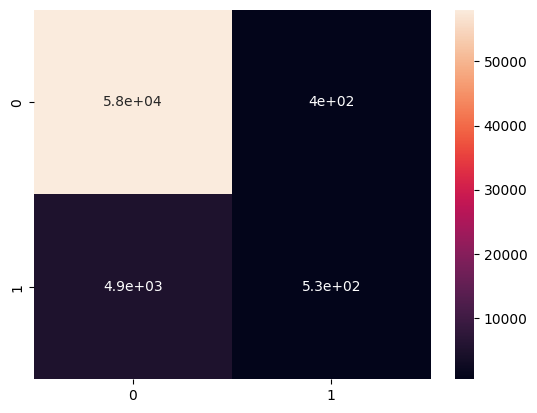

In [ ]:
# Logistic Regression
# define models and parameters
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Predicting on the test data
lr_pred = grid_result.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, lr_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



Text(0, 0.5, 'True positive rate')

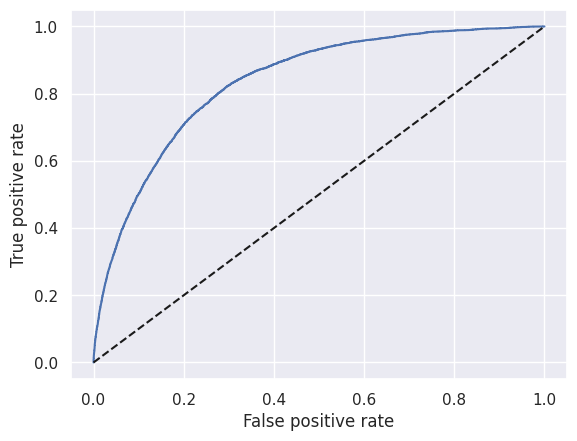

In [ ]:
# plot roc curve
y_pred_proba = grid_result.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Model 2: Naive Bayes

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     58484
           1       0.20      0.78      0.32      5475

    accuracy                           0.71     63959
   macro avg       0.59      0.74      0.57     63959
weighted avg       0.91      0.71      0.78     63959



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



Text(0, 0.5, 'True positive rate')

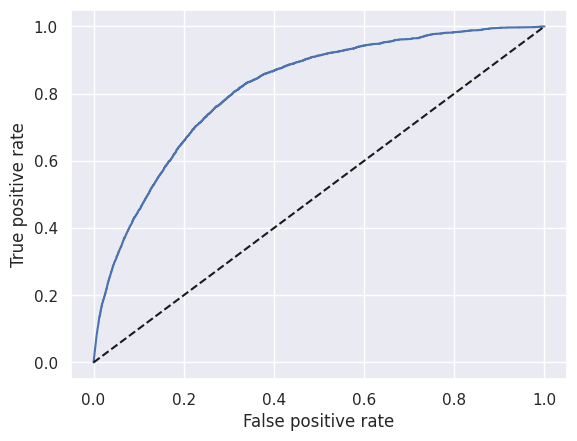

In [ ]:
# Naive Bayes
# Build a Gaussian Classifier
gnb = GaussianNB()
# Model training
gnb.fit(x_train, y_train)

# Predict Output
gnb_pred = gnb.predict(x_test)

# Classification report
print(classification_report(y_test, gnb_pred))

# plot roc curve
y_pred_proba = gnb.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     58484
           1       0.31      0.44      0.36      5475

    accuracy                           0.87     63959
   macro avg       0.63      0.68      0.64     63959
weighted avg       0.89      0.87      0.88     63959



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but BernoulliNB was fitted with feature names



Text(0, 0.5, 'True positive rate')

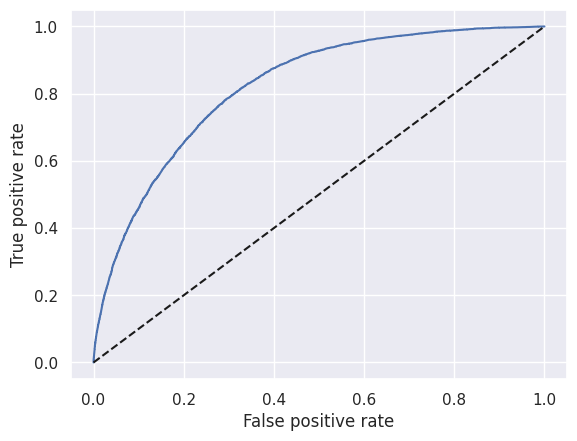

In [ ]:
# Naive Bayes
# Build a Bernoulli Classifier
bnb = BernoulliNB()
# Model training
bnb.fit(x_train, y_train)

# Predict Output
bnb_pred = bnb.predict(x_test)

# Classification report
print(classification_report(y_test, bnb_pred))

# plot roc curve
y_pred_proba = bnb.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Model 3: Neural Network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
7995/7995 [==============================] - 22s 3ms/step - loss: 0.2341 - accuracy: 0.9142 - val_loss: 0.2289 - val_accuracy: 0.9155
Epoch 2/40
7995/7995 [==============================] - 19s 2ms/step - loss: 0.2263 - accuracy: 0.9155 - val_loss: 0.2288 - val_accuracy: 0.9162
Epoch 3/40
7995/7995 [==============================] - 25s 3ms/step - loss: 0.2259 - accuracy: 0.9156 - val_loss: 0.2276 - val_accuracy: 0.9163
Epoch 4/40
7995/799

<Axes: >

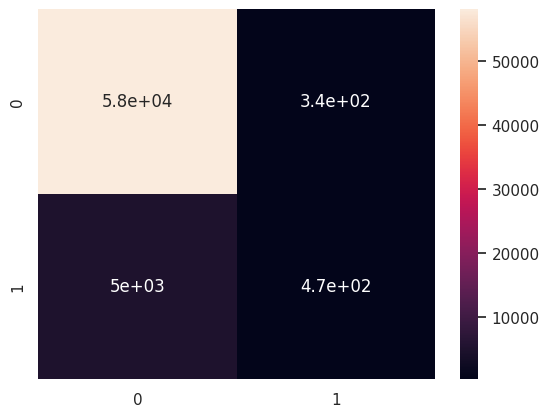

In [ ]:
# Neural Network

NN = Sequential()
NN.add(Dense(8, activation='relu', input_dim=40))
NN.add(Dense(1, activation='sigmoid'))
NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NN.summary()
hist = NN.fit(x_train, y_train, validation_data=(x_test, y_test),
              epochs=40, batch_size=32)

#validate the model
nn_pred=NN.predict(x_test)> 0.5

# Classification report
print(classification_report(y_test, nn_pred))

# Confusion matrix
cm = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm, annot=True)


Model 4: Decision Tree

In [ ]:
#optimizing decision tree depth
score = []
for i in range(1,12):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(x_train,y_train)
    y_pred = dtree.predict(x_test)
    score.append(round(accuracy_score(y_test,y_pred),4))
print("Maximum depth", score.index(max(score)))
print( "Maximum score", max(score))


Maximum depth 4
Maximum score 0.9154


0.9149142419362404
[[58340   144]
 [ 5298   177]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58484
           1       0.55      0.03      0.06      5475

    accuracy                           0.91     63959
   macro avg       0.73      0.51      0.51     63959
weighted avg       0.89      0.91      0.88     63959



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Text(0, 0.5, 'True positive rate')

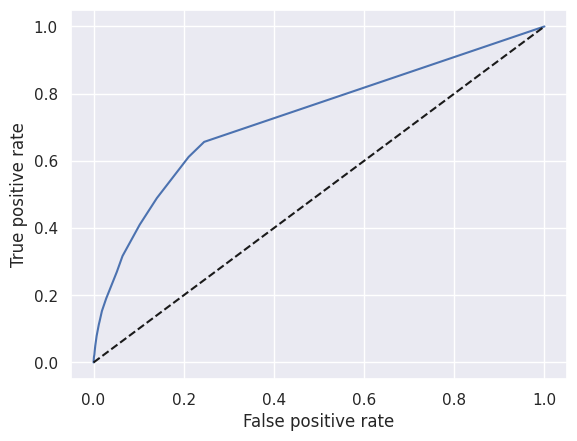

In [ ]:
# Decision Tree

dt = DecisionTreeClassifier(max_depth = 4, random_state = 599)
dt.fit(x_train,y_train)

#validate the model
dt_pred=dt.predict(x_test)
print(accuracy_score(y_test, dt_pred))

#Confusion matrix
cm=confusion_matrix(y_test,dt_pred)
print(cm)

# Classification report
print(classification_report(y_test, dt_pred))

# plot roc curve
y_pred_proba = dt.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


Model 5: Random Forest

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58484
           1       0.67      0.02      0.03      5475

    accuracy                           0.92     63959
   macro avg       0.79      0.51      0.49     63959
weighted avg       0.89      0.92      0.88     63959



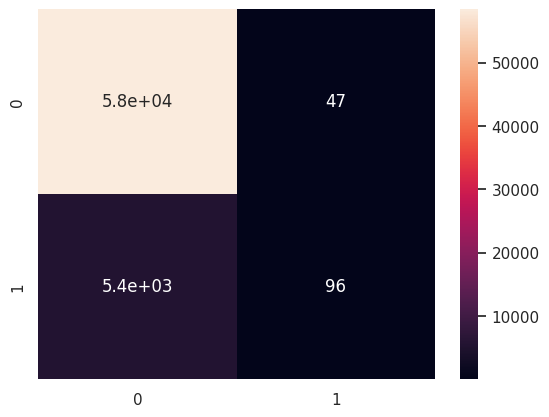

In [ ]:
#  Random Forest

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# define model
rf=RandomForestClassifier(random_state = 599)
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)

rf_grid.fit(x_train, y_train)

#validate the model
rf_pred = rf_grid.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, rf_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Text(0, 0.5, 'True positive rate')

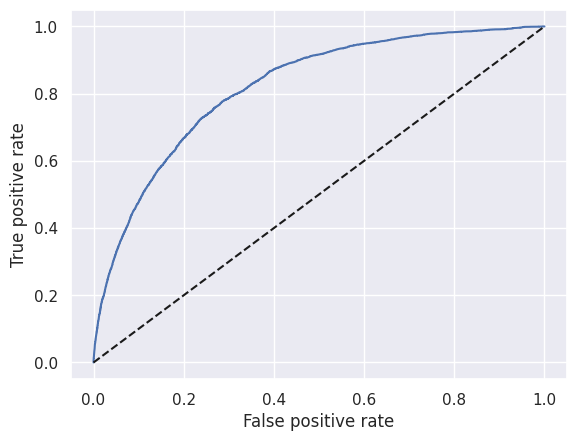

In [ ]:
# plot roc curve for random forest
y_pred_proba = rf_grid.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Model 6: K-Nearest Neighbor (KNN)

In [ ]:
# K-Nearest Neighbor (KNN)
grid_params = { 'n_neighbors' : [3,5,7,9],
               'metric' : ['euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3,
                  n_jobs = -1)
# fit the model on our train set
g_res = gs.fit(x_train, y_train)
# find the best score
g_res.best_score_
# get the hyperparameters with the best score
g_res.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'metric': 'manhattan', 'n_neighbors': 9}

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58484
           1       0.41      0.08      0.14      5475

    accuracy                           0.91     63959
   macro avg       0.66      0.54      0.54     63959
weighted avg       0.88      0.91      0.88     63959



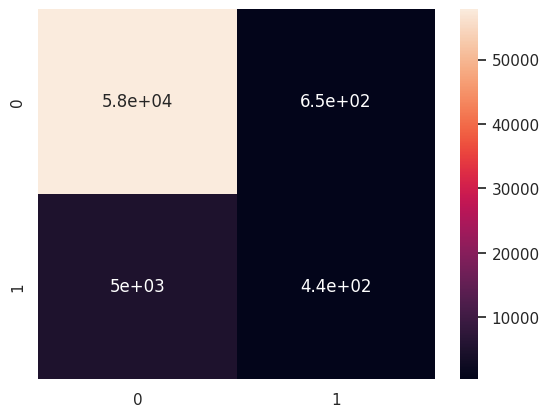

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan')
knn_clf.fit(x_train, y_train)

# Predictions for test data
knn_pred = knn_clf.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, knn_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



Text(0, 0.5, 'True positive rate')

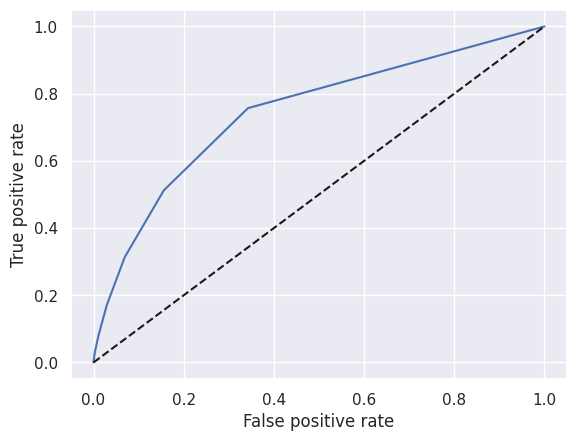

In [ ]:
# plot roc curve for k-nearest neighbor
y_pred_proba = knn_clf.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Model 7: Linear Discriminant Analysis (LDA)

In [ ]:
# Linear Discriminant Analysis (LDA)
# define model
model = LinearDiscriminantAnalysis()

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['solver'] = ['svd']

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(x_train, y_train)

# Predictions for test data
lda_pred = search.predict(x_test)

# Print confusion matrix
confusion_matrix(y_test, lda_pred)
print(classification_report(y_test,lda_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     58484
           1       0.43      0.25      0.32      5475

    accuracy                           0.91     63959
   macro avg       0.68      0.61      0.63     63959
weighted avg       0.89      0.91      0.90     63959



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but BernoulliNB was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature 

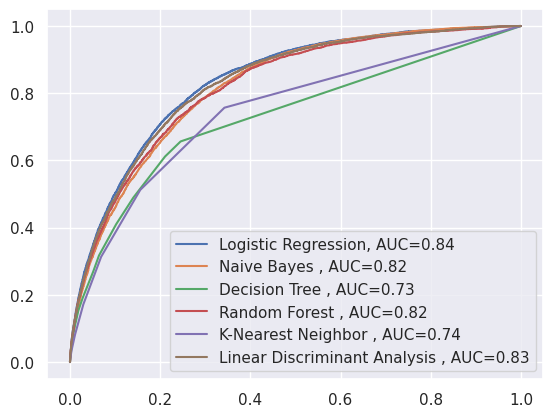

In [ ]:
# Comparison of All 7 Models

#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
y_pred_proba = grid_result.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(AUROC))

#fit naive bayes model and plot ROC curve
y_pred = bnb.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Naive Bayes , AUC="+str(AUROC))

#fit neural network model and plot ROC curve
#y_pred = hist.predict_proba(np.array(x_test))[:, 1]
#fpr, tpr, _ = roc_curve(y_test, y_pred)
#AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
#plt.plot(fpr,tpr,label="Gradient Boosting , AUC="+str(AUROC))

#fit decision tree model and plot ROC curve
y_pred = dt.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Decision Tree , AUC="+str(AUROC))


#fit random forest model and plot ROC curve
y_pred = rf_grid.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Random Forest , AUC="+str(AUROC))

#fit k-nearest neighbor  model and plot ROC curve
y_pred = knn_clf.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="K-Nearest Neighbor , AUC="+str(AUROC))

#fit linear discriminant analysis  model and plot ROC curve
y_pred = results.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Linear Discriminant Analysis , AUC="+str(AUROC))

#add legend
sns.set(rc={'figure.figsize':(8,6)})
plt.legend();


The accuracy score achieved using     Logistic Regression is: 91.64 %
The accuracy score achieved using     Naive Bayes is: 86.71 %
The accuracy score achieved using     Support Vector Machine is: 91.64 %
The accuracy score achieved using     K-Nearest Neighbors is: 91.49 %
The accuracy score achieved using     Decision Tree is: 91.52 %
The accuracy score achieved using     Random Forest is: 91.12 %
The accuracy score achieved using     Neural Network is: 90.76 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

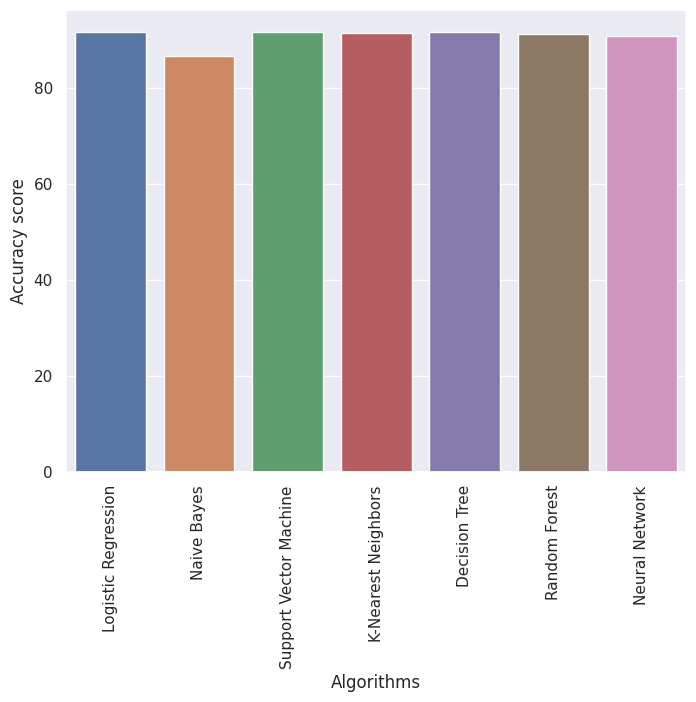

In [ ]:
# Accuracy score comparision
score_lr = round(accuracy_score(lr_pred,y_test)*100,2)
score_nb = round(accuracy_score(bnb_pred,y_test)*100,2)
score_nn = round(accuracy_score(nn_pred,y_test)*100,2)
score_dt = round(accuracy_score(dt_pred,y_test)*100,2)
score_rf = round(accuracy_score(rf_pred,y_test)*100,2)
score_knn = round(accuracy_score(knn_pred,y_test)*100,2)
score_lda = round(accuracy_score(lda_pred,y_test)*100,2)

#Output final score
scores = [score_lr,score_nb,score_nn,score_dt,score_rf,score_knn,score_lda]
algorithms = ["Logistic Regression",
              "Naive Bayes",
              "Support Vector Machine",
              "K-Nearest Neighbors",
              "Decision Tree",
              "Random Forest",
              "Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using\
     "+algorithms[i]+" is: "+str(scores[i])+" %")

sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt. xticks(rotation='vertical')

sns.barplot(x=algorithms,y=scores)


<Axes: ylabel='Feature'>

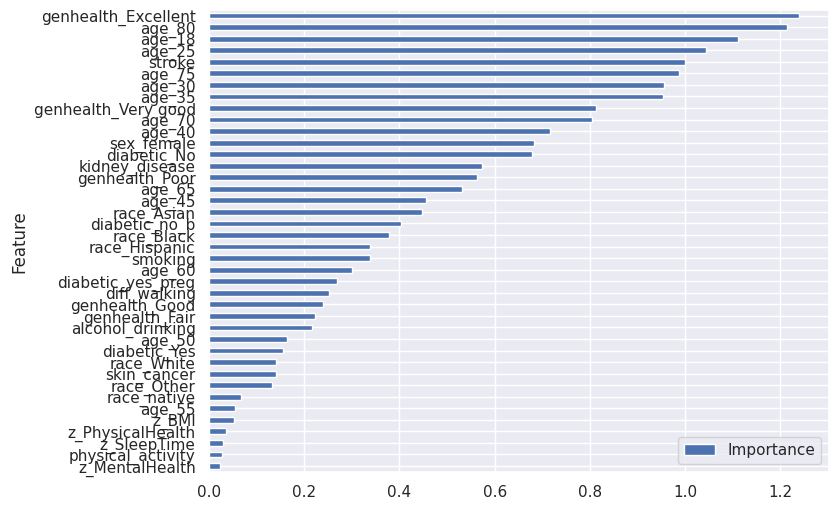

In [ ]:
# Feature Importance for Best Model (Logistic Regression)

logr = linear_model.LogisticRegression( C = 0.01, penalty ='l2',
                                       solver = 'liblinear')
logr.fit(x_train,y_train)

# get importance
coefficients = logr.coef_[0]
feature_importance = pd.DataFrame({'Feature': x_train.columns,
                                   'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance',
                                                    ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh',
                        figsize=(8, 6))


References

kandel, I. (2020). The effect of batch size on the generalizability of the convolutional neural networks on a histopathology dataset.https://www.sciencedirect.com/science/article/pii/S2405959519303455#:~:text=In%20practical%20terms%2C%20to%20determine,advantage%20of%20the%20GPUs%20processing.